# **구글 드라이브 마운트**

In [ ]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **로우 데이터**
로우 데이터 : 시카고 공공데이터포털 crimes-map

2021.04.20 - 2022.04.19 동안 시카고 내에서 발생한 모든 범죄 데이터 210284개


[chicago data portal - crimes-map](https://https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6)



In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/Chicago_Crimes_Map.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(filename)
df

CASE#     DATE  OF OCCURRENCE                   BLOCK  IUCR  \
0       JF121694  12/07/2021 01:00:00 PM  052XX S BLACKSTONE AVE  0820   
1       JE446397  11/15/2021 12:00:00 AM         020XX W 52ND ST  1750   
2       JF156654  11/01/2021 12:00:00 AM    020XX W ARMITAGE AVE  1120   
3       JF104823  12/30/2021 03:45:00 PM      017XX N CICERO AVE  1206   
4       JE266628  06/15/2021 09:30:00 AM      080XX S DREXEL AVE  0820   
...          ...                     ...                     ...   ...   
210280  JF201027  04/08/2022 12:00:00 AM       075XX S COLES AVE  0486   
210281  JF203321  04/08/2022 09:00:00 PM        039XX N BROADWAY  0810   
210282  JF191216  03/30/2022 10:07:00 AM      013XX N PULASKI RD  0460   
210283  JF201607  04/08/2022 02:46:00 PM   082XX S INGLESIDE AVE  0486   
210284  JF206895  02/24/2022 12:24:00 PM   062XX N WASHTENAW AVE  0820   

               PRIMARY DESCRIPTION           SECONDARY DESCRIPTION  \
0                            THEFT                  $500 AND UNDER   
1       OFFENSE INVOLVING CHILDREN                     CHILD ABUSE   
2               DECEPTIVE PRACTICE                         FORGERY   
3               DECEPTIVE PRACTICE  THEFT BY LESSEE, MOTOR VEHICLE   
4                            THEFT                  $500 AND UNDER   
...                            ...                             ...   
210280                     BATTERY         DOMESTIC BATTERY SIMPLE   
210281                       THEFT                       OVER $500   
210282                     BATTERY                          SIMPLE   
210283                     BATTERY         DOMESTIC BATTERY SIMPLE   
210284                       THEFT                  $500 AND UNDER   

                LOCATION DESCRIPTION ARREST DOMESTIC  BEAT  WARD FBI CD  \
0                             STREET      N        N   234   4.0     06   
1                          RESIDENCE      N        Y   932  16.0    08B   
2                        GAS STATION      N        N  1432  32.0     10   
3       COMMERCIAL / BUSINESS OFFICE      N        N  2533  37.0     11   
4                             STREET      N        N   631   8.0     06   
...                              ...    ...      ...   ...   ...    ...   
210280                     APARTMENT      N        Y   421   7.0    08B   
210281                     APARTMENT      N        N  1923  46.0     06   
210282            SMALL RETAIL STORE      N        N  2534  27.0    08B   
210283                     APARTMENT      N        Y   631   8.0    08B   
210284   RESIDENCE - PORCH / HALLWAY      N        N  2413  50.0     06   

        X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE  \
0                NaN           NaN        NaN        NaN   
1                NaN           NaN        NaN        NaN   
2                NaN           NaN        NaN        NaN   
3                NaN           NaN        NaN        NaN   
4          1183633.0     1851786.0  41.748486 -87.602675   
...              ...           ...        ...        ...   
210280     1195740.0     1855872.0  41.759408 -87.558177   
210281     1170184.0     1926344.0  41.953383 -87.649782   
210282     1149466.0     1908864.0  41.905844 -87.726398   
210283     1183997.0     1850610.0  41.745251 -87.601378   
210284     1157198.0     1941366.0  41.994878 -87.697109   

                             LOCATION  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4       (41.748486365, -87.602675062)  
...                               ...  
210280  (41.759407969, -87.558176691)  
210281  (41.953382657, -87.649781959)  
210282  (41.905844192, -87.726398267)  
210283   (41.745250808, -87.60137791)  
210284   (41.99487809, -87.697109475)  

[210285 rows x 17 columns]

# **데이터 선별**

* 장소 정보 중 유의미한 길거리 조경 데이터: STREET, SIDEWALK, ALLEY만 사용하기로 결정

In [ ]:
# Location description에서 장소 정보 추출

df[' LOCATION DESCRIPTION'].value_counts().head(60)

STREET                                            53429
APARTMENT                                         44142
RESIDENCE                                         29498
SIDEWALK                                          11737
PARKING LOT / GARAGE (NON RESIDENTIAL)             6973
SMALL RETAIL STORE                                 6185
ALLEY                                              4740
RESTAURANT                                         4291
COMMERCIAL / BUSINESS OFFICE                       3070
OTHER (SPECIFY)                                    3035
GAS STATION                                        3007
RESIDENCE - PORCH / HALLWAY                        2924
DEPARTMENT STORE                                   2893
VEHICLE NON-COMMERCIAL                             2749
RESIDENCE - GARAGE                                 2472
RESIDENCE - YARD (FRONT / BACK)                    2311
GROCERY FOOD STORE                                 2082
PARK PROPERTY                                   

In [ ]:
# 결측치 제거를 위하여 isnull() 이용, missing 값이 0인 열만 추출

df['missing'] = df.isnull().sum(axis=1)
df.head(5)

CASE#     DATE  OF OCCURRENCE                   BLOCK  IUCR  \
0  JF121694  12/07/2021 01:00:00 PM  052XX S BLACKSTONE AVE  0820   
1  JE446397  11/15/2021 12:00:00 AM         020XX W 52ND ST  1750   
2  JF156654  11/01/2021 12:00:00 AM    020XX W ARMITAGE AVE  1120   
3  JF104823  12/30/2021 03:45:00 PM      017XX N CICERO AVE  1206   
4  JE266628  06/15/2021 09:30:00 AM      080XX S DREXEL AVE  0820   

          PRIMARY DESCRIPTION           SECONDARY DESCRIPTION  \
0                       THEFT                  $500 AND UNDER   
1  OFFENSE INVOLVING CHILDREN                     CHILD ABUSE   
2          DECEPTIVE PRACTICE                         FORGERY   
3          DECEPTIVE PRACTICE  THEFT BY LESSEE, MOTOR VEHICLE   
4                       THEFT                  $500 AND UNDER   

           LOCATION DESCRIPTION ARREST DOMESTIC  BEAT  WARD FBI CD  \
0                        STREET      N        N   234   4.0     06   
1                     RESIDENCE      N        Y   932  16.0    08B   
2                   GAS STATION      N        N  1432  32.0     10   
3  COMMERCIAL / BUSINESS OFFICE      N        N  2533  37.0     11   
4                        STREET      N        N   631   8.0     06   

   X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE  \
0           NaN           NaN        NaN        NaN   
1           NaN           NaN        NaN        NaN   
2           NaN           NaN        NaN        NaN   
3           NaN           NaN        NaN        NaN   
4     1183633.0     1851786.0  41.748486 -87.602675   

                        LOCATION  missing  
0                            NaN        5  
1                            NaN        5  
2                            NaN        5  
3                            NaN        5  
4  (41.748486365, -87.602675062)        0

In [ ]:
# 205901개의 정상 데이터

df['missing'].value_counts()

0    205901
5      3732
1       488
6       164
Name: missing, dtype: int64

In [ ]:
# 결측치가 없는 데이터들 중 location이 Street, Sidewalk, Alley만 추출 - 69298개

df2=df[df['missing']==0]
df3=df2[(df[' LOCATION DESCRIPTION']=='STREET')|(df[' LOCATION DESCRIPTION']=='SIDEWALK')|(df[' LOCATION DESCRIPTION']=='ALLEY')]
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


CASE#     DATE  OF OCCURRENCE                  BLOCK  IUCR  \
4       JE266628  06/15/2021 09:30:00 AM     080XX S DREXEL AVE  0820   
5       JE266536  06/15/2021 07:50:00 AM     042XX W MADISON ST  0560   
7       JE267466  06/15/2021 09:01:00 PM     007XX S KEDZIE AVE  051B   
10      JE266604  06/15/2021 09:20:00 AM      013XX W ANCONA ST  0430   
11      JE266568  06/15/2021 01:30:00 AM  055XX N MC VICKER AVE  0810   
...          ...                     ...                    ...   ...   
210258  JF202410  04/08/2022 09:00:00 PM       012XX W 110TH PL  0910   
210268  JF201058  04/08/2022 12:00:00 AM        010XX E 55TH ST  1812   
210271  JF206883  04/08/2022 02:00:00 PM     066XX S TALMAN AVE  0910   
210272  JF201915  04/08/2022 06:45:00 PM     038XX N HARLEM AVE  1320   
210276  JF201831  04/08/2022 11:30:00 AM       001XX W ADAMS ST  1220   

        PRIMARY DESCRIPTION                  SECONDARY DESCRIPTION  \
4                     THEFT                         $500 AND UNDER   
5                   ASSAULT                                 SIMPLE   
7                   ASSAULT             AGGRAVATED - OTHER FIREARM   
10                  BATTERY    AGGRAVATED - OTHER DANGEROUS WEAPON   
11                    THEFT                              OVER $500   
...                     ...                                    ...   
210258  MOTOR VEHICLE THEFT                             AUTOMOBILE   
210268            NARCOTICS  POSSESS - CANNABIS MORE THAN 30 GRAMS   
210271  MOTOR VEHICLE THEFT                             AUTOMOBILE   
210272      CRIMINAL DAMAGE                             TO VEHICLE   
210276   DECEPTIVE PRACTICE       THEFT OF LOST / MISLAID PROPERTY   

        LOCATION DESCRIPTION ARREST DOMESTIC  BEAT  WARD FBI CD  X COORDINATE  \
4                     STREET      N        N   631   8.0     06     1183633.0   
5                   SIDEWALK      N        N  1115  28.0    08A     1148227.0   
7                   SIDEWALK      Y        N  1134  24.0    04A     1155154.0   
10                    STREET      N        N  1215   1.0    04B     1167362.0   
11                    STREET      N        N  1622  45.0     06     1134905.0   
...                      ...    ...      ...   ...   ...    ...           ...   
210258                STREET      N        N  2234  34.0     07     1169973.0   
210268                STREET      Y        N   233   5.0     18     1183991.0   
210271                STREET      N        N   831  17.0     07     1159851.0   
210272                 ALLEY      N        Y  1631  38.0     14     1127385.0   
210276                STREET      N        N   122  42.0     11     1175421.0   

        Y COORDINATE   LATITUDE  LONGITUDE                       LOCATION  \
4          1851786.0  41.748486 -87.602675  (41.748486365, -87.602675062)   
5          1899678.0  41.880661 -87.731186  (41.880660786, -87.731186405)   
7          1896404.0  41.871540 -87.705839   (41.87154041, -87.705838807)   
10         1904648.0  41.893909 -87.660781  (41.893908928, -87.660781353)   
11         1936579.0  41.982167 -87.779229  (41.982167364, -87.779228689)   
...              ...        ...        ...                            ...   
210258     1831504.0  41.693137 -87.653317  (41.693136959, -87.653316976)   
210268     1868865.0  41.795344 -87.600830  (41.795344382, -87.600830214)   
210271     1860546.0  41.773046 -87.689581  (41.773046248, -87.689580621)   
210272     1924642.0  41.949541 -87.807155  (41.949541101, -87.807155477)   
210276     1899429.0  41.879411 -87.631340  (41.879410537, -87.631340358)   

        missing  
4             0  
5             0  
7             0  
10            0  
11            0  
...         ...  
210258        0  
210268        0  
210271        0  
210272        0  
210276        0  

[69299 rows x 18 columns]

In [ ]:
# df_street를 chicago_street.csv에 장소, X좌표, Y좌표, 위치를 포함한 데이터프레임으로 저장

df_street=df3[['CASE#',' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LOCATION']]
df_street.to_csv('/content/drive/MyDrive/chicago_street.csv',header=True,index=True)
df_street

CASE#  LOCATION DESCRIPTION  X COORDINATE  Y COORDINATE  \
4       JE266628                STREET     1183633.0     1851786.0   
5       JE266536              SIDEWALK     1148227.0     1899678.0   
7       JE267466              SIDEWALK     1155154.0     1896404.0   
10      JE266604                STREET     1167362.0     1904648.0   
11      JE266568                STREET     1134905.0     1936579.0   
...          ...                   ...           ...           ...   
210258  JF202410                STREET     1169973.0     1831504.0   
210268  JF201058                STREET     1183991.0     1868865.0   
210271  JF206883                STREET     1159851.0     1860546.0   
210272  JF201915                 ALLEY     1127385.0     1924642.0   
210276  JF201831                STREET     1175421.0     1899429.0   

                             LOCATION  
4       (41.748486365, -87.602675062)  
5       (41.880660786, -87.731186405)  
7        (41.87154041, -87.705838807)  
10      (41.893908928, -87.660781353)  
11      (41.982167364, -87.779228689)  
...                               ...  
210258  (41.693136959, -87.653316976)  
210268  (41.795344382, -87.600830214)  
210271  (41.773046248, -87.689580621)  
210272  (41.949541101, -87.807155477)  
210276  (41.879410537, -87.631340358)  

[69299 rows x 5 columns]

**추후 연구를 위한 절도 데이터 저장** 
- 주거침입과 외부 범죄는 조경의 요소가 다를 것이라고 판단하였으나, 본 연구에서는 시간의 부족으로 인하여 시행하지 못함. 추후 확장 연구에서 사용할 예정
- 유의미한 주거 침입 데이터(theft, bulglary, criminal terepass) 중 location data가 Apartment, Residence 인 데이터만 활용

In [ ]:
# 절도 데이터 13278개 저장

df4=df2[((df[' LOCATION DESCRIPTION']=='APARTMENT')|(df[' LOCATION DESCRIPTION']=='RESIDENCE'))]
df4=df4[((df[' PRIMARY DESCRIPTION']=='THEFT')|(df[' PRIMARY DESCRIPTION']=='BURGLARY')|(df[' PRIMARY DESCRIPTION']=='CRIMINAL TREPASS')|(df[' PRIMARY DESCRIPTION']=='ROBBERY'))]
df_residence=df4[['CASE#',' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LOCATION']]
df_residence.to_csv('/content/drive/MyDrive/chicago_residence.csv',header=True,index=True)
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


CASE#     DATE  OF OCCURRENCE                 BLOCK  IUCR  \
60      JE267041  06/15/2021 05:30:00 AM   006XX N LA SALLE DR  0890   
74      JE364927  09/07/2021 04:49:00 PM   048XX W CATALPA AVE  0630   
115     JF115362  01/17/2022 09:00:00 AM       020XX W 69TH ST  0820   
117     JE447180  11/15/2021 10:00:00 AM       018XX W ERIE ST  0820   
119     JE432672  11/01/2021 08:24:00 PM  055XX N CAMPBELL AVE  0890   
...          ...                     ...                   ...   ...   
210236  JF205576  03/26/2022 09:00:00 AM   019XX N ROCKWELL ST  0890   
210239  JF201242  04/08/2022 09:23:00 AM     075XX S PEORIA ST  0620   
210250  JF206693  01/01/2022 12:00:00 AM    037XX N HALSTED ST  0890   
210259  JF201739  04/08/2022 08:45:00 AM     079XX S COLES AVE  0610   
210281  JF203321  04/08/2022 09:00:00 PM      039XX N BROADWAY  0810   

        PRIMARY DESCRIPTION   SECONDARY DESCRIPTION  LOCATION DESCRIPTION  \
60                    THEFT           FROM BUILDING             APARTMENT   
74                 BURGLARY  ATTEMPT FORCIBLE ENTRY             RESIDENCE   
115                   THEFT          $500 AND UNDER             RESIDENCE   
117                   THEFT          $500 AND UNDER             RESIDENCE   
119                   THEFT           FROM BUILDING             APARTMENT   
...                     ...                     ...                   ...   
210236                THEFT           FROM BUILDING             APARTMENT   
210239             BURGLARY          UNLAWFUL ENTRY             RESIDENCE   
210250                THEFT           FROM BUILDING             APARTMENT   
210259             BURGLARY          FORCIBLE ENTRY             APARTMENT   
210281                THEFT               OVER $500             APARTMENT   

       ARREST DOMESTIC  BEAT  WARD FBI CD  X COORDINATE  Y COORDINATE  \
60          N        N  1832  42.0     06     1175015.0     1904892.0   
74          N        N  1621  39.0     05     1142927.0     1935846.0   
115         N        Y   735  17.0     06     1163982.0     1858896.0   
117         N        N  1221   1.0     06     1163990.0     1904378.0   
119         N        N  2011  40.0     06     1158670.0     1936635.0   
...       ...      ...   ...   ...    ...           ...           ...   
210236      N        N  1421   1.0     06     1158728.0     1912752.0   
210239      N        N   621  17.0     05     1171611.0     1854870.0   
210250      N        N  1923  46.0     06     1170244.0     1925277.0   
210259      N        N   422   7.0     05     1198196.0     1853097.0   
210281      N        N  1923  46.0     06     1170184.0     1926344.0   

         LATITUDE  LONGITUDE                       LOCATION  missing  
60      41.894410 -87.632667  (41.894410424, -87.632667323)        0  
74      41.980010 -87.749744  (41.980009762, -87.749743818)        0  
115     41.768433 -87.674484  (41.768432571, -87.674483677)        0  
117     41.893240 -87.673173   (41.89323989, -87.673173199)        0  
119     41.981866 -87.691825  (41.981865891, -87.691825111)        0  
...           ...        ...                            ...      ...  
210236  41.916328 -87.692269  (41.916328303, -87.692268776)        0  
210239  41.757221 -87.646637  (41.757220958, -87.646637498)        0  
210250  41.950453 -87.649593  (41.950453457, -87.649592688)        0  
210259  41.751732 -87.549268  (41.751732099, -87.549268415)        0  
210281  41.953383 -87.649782  (41.953382657, -87.649781959)        0  

[13279 rows x 18 columns]

# **범죄 좌표 데이터 추출**
* 구글 API를 이용한 다중 이미지 크롤링을 위해 좌표 데이터를 추출해, 좌표와 좌표 사이를 ;로 연결한다.

In [ ]:
# 범죄의 좌표 데이터만 추출한다.

df_street=df3[['LOCATION']]
df_street

LOCATION
4       (41.748486365, -87.602675062)
5       (41.880660786, -87.731186405)
7        (41.87154041, -87.705838807)
10      (41.893908928, -87.660781353)
11      (41.982167364, -87.779228689)
...                               ...
210258  (41.693136959, -87.653316976)
210268  (41.795344382, -87.600830214)
210271  (41.773046248, -87.689580621)
210272  (41.949541101, -87.807155477)
210276  (41.879410537, -87.631340358)

[69299 rows x 1 columns]

In [ ]:
# 좌우의 ()을 지운다.

df_street['LOCATION'] = df_street['LOCATION'].str.replace('(','')
df_street['LOCATION'] = df_street['LOCATION'].str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/li

In [ ]:
# df_street에 있는 location들을 일정 갯수 단위로 끊어 txt 파일로 저장한다.
# API를 이용한 크롤링 시 Free credit 한도가 약 28000개이다.
# 하나의 location당 전/후/좌/우 총 4개의 이미지를 다운받아야만 하므로 7000개의 이미지씩 잘라 txt 파일로 저장한다.

count = 0
filename = 1


for i in range(len(df_street)//7000 + 1): # 몇 번의 iteration: 몇 개의 파일을 만들지 결정한다 
    
    file = open('/content/drive/MyDrive/crimes_street_location'+str(filename)+'.txt', 'w') # 파일명을 지정하고 "쓰기"로 연다
    
    str_street = ''                                                                        # initializing
    for j in range(7000):                                                                  # 7000번 반복
        str_street += df_street['LOCATION'].values[count]+';'                              # 위에서부터 읽어내려가면서 끝에 ;를 삽입한다
        count += 1                                                                         # 끝 지점을 확인하기 위한 count
        if count>=69299:                                                                   # 전체 len인 69299개를 넘어가면 끝낸다
          break
    
    file.write(str_street)                                                                  # 연 파일에 문자열을 한 줄로 저장한다
    file.close()                                                                            # 파일을 닫는다
        
    filename += 1                                                                           # 파일 이름 갱신
    print(i, count, filename)                                                               # 총 10개의 파일이 저장된다

0 7000 2
1 14000 3
2 21000 4
3 28000 5
4 35000 6
5 42000 7
6 49000 8
7 56000 9
8 63000 10
9 69299 11


# **대조군 추출**
* non-crime data를 대조군으로 추출하기 위하여 좌표를 지정한다.
* 좌표상 ±0.002는 GSV(google street view)에서 유의미한 이미지 변화폭이 아니므로 중복 범위를 ±0.0002로 정한다.

In [ ]:
# 서로 다른 다섯 군데의 영역에서 각각 8000개의 데이터를, 총 40000개의 데이터를 추출

import random

random_st=[[], []]

for _ in range(8000):
  random_st[0].append(random.uniform(41.657642224273935, 41.73524140790136))
  random_st[1].append(random.uniform(-87.6826461967214, -87.54017313021824))

for _ in range(8000):
  random_st[0].append(random.uniform(41.734302009971586, 41.86804634998437))
  random_st[1].append(random.uniform(-87.74194300886965, -87.61816790927202))

for _ in range(8000):
  random_st[0].append(random.uniform(41.86618423797306, 41.91272082279052))
  random_st[1].append(random.uniform(-87.77757523350625, -87.6212935420951))

for _ in range(8000):
  random_st[0].append(random.uniform(41.910860010323525, 41.95364497186919))
  random_st[1].append(random.uniform(-87.80633106472591, -87.64379810565832))

for _ in range(8000):
  random_st[0].append(random.uniform(41.95457476099471, 41.997794974904345))
  random_st[1].append(random.uniform(-87.78695213499093, -87.65380013390863))

print(random_st)

[[41.67242149066704, 41.71889063039979, 41.73484966808277, 41.73397134428963, 41.67485225656468, 41.69748687614928, 41.698128486926315, 41.715892208266496, 41.70729321004964, 41.718361189240056, 41.65768306193454, 41.692824499292726, 41.68314507093651, 41.71802267532231, 41.67733632961308, 41.67612229429436, 41.703533235492394, 41.66993766301781, 41.68472666353579, 41.72526000396769, 41.73089803404362, 41.6627067566584, 41.66601083598245, 41.715283062840875, 41.71483168401803, 41.70609494198088, 41.715313346082574, 41.686368607040144, 41.730344901105035, 41.6694966321659, 41.69110207550551, 41.72524524491179, 41.720354257687916, 41.69683290268436, 41.71770763460541, 41.66575264260226, 41.65918477430486, 41.715103443985946, 41.67058912354893, 41.6768924313008, 41.6656506154311, 41.69450332352558, 41.72267261811396, 41.65894877086929, 41.675954716212104, 41.717137431448826, 41.66853471904632, 41.67576240744721, 41.65933189228849, 41.7257570433914, 41.70214456756747, 41.68253449204755, 41

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/chicago_street.csv") # chicago_street을 데이터프레임으로 열어온다 
df  

Unnamed: 0     CASE#  LOCATION DESCRIPTION  X COORDINATE  Y COORDINATE  \
0               4  JE266628                STREET     1183633.0     1851786.0   
1               5  JE266536              SIDEWALK     1148227.0     1899678.0   
2               7  JE267466              SIDEWALK     1155154.0     1896404.0   
3              10  JE266604                STREET     1167362.0     1904648.0   
4              11  JE266568                STREET     1134905.0     1936579.0   
...           ...       ...                   ...           ...           ...   
69294      210258  JF202410                STREET     1169973.0     1831504.0   
69295      210268  JF201058                STREET     1183991.0     1868865.0   
69296      210271  JF206883                STREET     1159851.0     1860546.0   
69297      210272  JF201915                 ALLEY     1127385.0     1924642.0   
69298      210276  JF201831                STREET     1175421.0     1899429.0   

                            LOCATION  
0      (41.748486365, -87.602675062)  
1      (41.880660786, -87.731186405)  
2       (41.87154041, -87.705838807)  
3      (41.893908928, -87.660781353)  
4      (41.982167364, -87.779228689)  
...                              ...  
69294  (41.693136959, -87.653316976)  
69295  (41.795344382, -87.600830214)  
69296  (41.773046248, -87.689580621)  
69297  (41.949541101, -87.807155477)  
69298  (41.879410537, -87.631340358)  

[69299 rows x 6 columns]

In [ ]:
# Location의 괄호를 지운다.
df['LOCATION'] = df['LOCATION'].str.replace('(','')
df['LOCATION'] = df['LOCATION'].str.replace(')','')

# str_street의 0번 리스트에는 x좌표를, 1번 리스트에는 y좌표를 할당한다.
# 이는 이후의 random_st와의 비교를 통하여 중복되는 부분들을 지우기 위해서이다.
str_street=[[], []]
for i in range(len(df)):
  temp = str(df['LOCATION'].values[i]).split(", ")

  str_street[0].append(float(temp[0]))
  str_street[1].append(float(temp[1]))


print(str_street)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


[[41.748486365, 41.880660786, 41.87154041, 41.893908928, 41.982167364, 41.745565169, 41.798854705, 41.95812305, 41.734695188, 41.946054074, 41.751347216, 41.934035613, 41.872588258, 41.876599436, 41.960153995, 41.775428827, 41.797080971, 41.909240949, 41.906095915, 41.985443324, 41.93707952, 41.961754838, 41.855243502, 41.721329787, 41.772382595, 41.878582195, 41.900816648, 41.993927244, 41.729327524, 41.960621617, 41.971918581, 41.856106646, 41.924906294, 41.87939118, 41.809749425, 41.754685973, 41.79629671, 41.795836051, 41.79108305, 41.977755667, 42.019809042, 41.740350594, 41.884779356, 41.87976976, 41.765161019, 41.967468351, 41.949439068, 41.879269694, 41.893857654, 41.936046155, 41.896685066, 41.859983323, 41.913358136, 41.92705295, 41.909904297, 41.80672353, 41.892296629, 41.856077445, 41.743135578, 41.670535505, 41.913677178, 41.750514079, 41.881785211, 41.849222028, 41.938960279, 41.880026057, 41.904381797, 41.783295917, 41.761946618, 41.998036055, 41.998195255, 41.871652181,

In [ ]:
# 중복되는 부분을 지우기 위하여 차이가 0,0002 이하일 경우 리스트에서 지운다(value를 0으로 만든다.)
# seed가 달라 실제 활용된 결과와는 다르다.

for i in range(len(random_st[0])):
  for h in range(len(str_street[0])):
    if abs(random_st[0][i] - str_street[0][h])<0.0002 and abs(random_st[1][i]-str_street[1][h])<0.0002:
        random_st[0][i] = 0
        random_st[1][i] = 0

print(random_st)

In [ ]:
# 40000개의 데이터 중 중복 데이터를 제외한 좌표 데이터만 API 크롤링에 적합하게 저장한다.

str_random = ''
count = 0

for i in range(40000):
  if random_st[0][i] != 0:
    str_random = str_random + str(random_st[0][i]) + ", "+str(random_st[1][i]) +";"
    count += 1
  
print(str_random)
print(count)

In [ ]:
file = open('/content/drive/MyDrive/non_criminal.txt', 'w')
file.write(str_random)
file.close()

In [ ]:
file=open('/content/drive/MyDrive/non_criminal.txt','r')
s=file.read()
print(s)

In [ ]:
list1=list(s.split(';'))
list2= list1[0:7000]
list3= list1[7000:14000]
list4= list1[14000:14000]

In [ ]:
k=0

for i in range(6):
  f = open('/content/drive/MyDrive/non_crimes_location'+str(i+1)+'.txt', 'w')
  list2=[]
  if k==35000:
    list2=list1[k:]
  else:
    list2=list1[k:k+7000]

  strr=''
  for j in list2:
    strr+=j+';'

  f.write(strr)
  f.close()
  print(i,k,list2[0])
  k+=7000

# **오픈API를 이용한 이미지 크롤링**
* 구글 API 키를 받아와 구글 맵에 접속하여 해당 좌표의 이미지들을 받아온다. 
* 360도 파노라마 데이터를 활용할 예정이므로 전/후/좌/우 총 4개의 이미지를 받아온다.

In [ ]:
# 구글 스트리트뷰를 설치한다
!pip install google_streetview
import google_streetview.api
import google_streetview.helpers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for google-streetview: filename=google_streetview-1.2.9-py3-none-any.whl size=9797 sha256=02367530a0a3a08f7f3de440fd7acabfaddabb49df8c27a372fff226d693e103
  Stored in directory: /root/.cache/pip/wheels/3d/3c/22/66891d135d7de956a903e1eac58515b816e499df0a6f486c28
  Created wheel for kwconfig: filename=kwconfig-1.1.7-py3-none-any.whl size=4991 sha256=416de8cf5ee33e439ff59009d1a64266e6333edeed5ca4f6844f464ad44b09a8
  Stored in directory: /root/.cache/pip/wheels/75/99/be/6216a0ec525d7bf335628c0ac2463f9a24357c0f07870db419
Successfully built google-streetview kwconfig


In [ ]:
file = open('///파일경로.파일명///', 'r')
s=file.read()

# Create a dictionary with multiple parameters separated by ;
apiargs = {
  'location': s,
  'size': '640x640',
  'heading': '270;0;90;180', # 270도, 0도, 90도, 180도 회전으로 카메라를 한 시점에서 90도씩 돌린 사진들을 받아온다.
  'fov': '90', # 시야각은 90도로 제한한다.
  'pitch': '0',
  'key':'////API 키///'
}

file.close()

In [ ]:
# 다수의 파라미터들로부터 가능한 쿼리들의 리스트를 받아온다.
api_list = google_streetview.helpers.api_list(apiargs)

# 가능한 결과 객체들을 모두 생성한다. 
results = google_streetview.api.results(api_list)

# 미리보기
results.preview()

# 디렉토리에 결과들을 다운로드한다.
results.download_links('drive/MyDrive/Colab Notebooks/mapdown1')

# 메타데이터를 저장한다. 
results.save_metadata('metadata.json')

* API 키를 더 이상 실행할 수 없으므로 실행 당시의 사진을 첨부합니다.

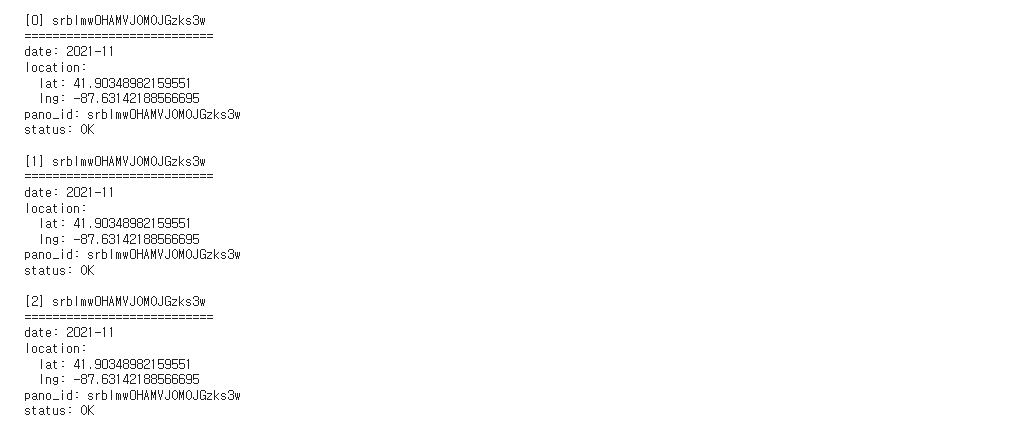

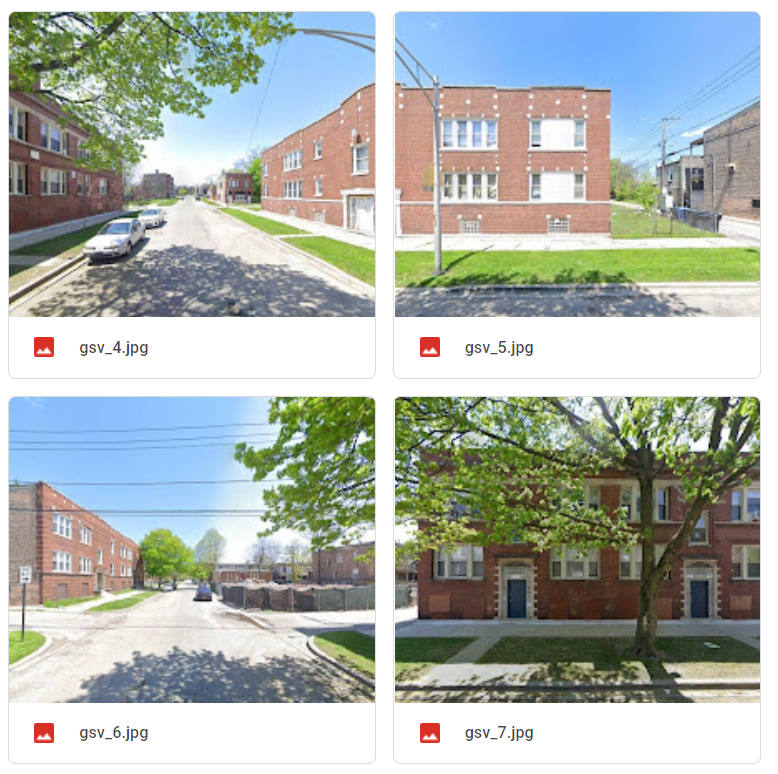

# **사진 데이터 전처리**
* 사진 데이터의 크기가 640*640인데, 이 사진 데이터들 4개를 모아 파노라마 데이터로 만들어야 한다.
* 추후 사용할 VGG16 모델에서는 정사각형 데이터를 받아오는 것이 정석이므로 정사각형 데이터로 변환해야 한다.

In [ ]:
from PIL import Image
# pillow 데이터
finalcount = 1
count = 0

for i in range(7000): # 받아온 사진 데이터들의 개수 - 마지막이 아니면 7000개로 고정한다.
    
    # 이미지는 gsv에서 한 번에 다운받을 경우 gsv_n 형태로 동일하게 다운받아진다.
    # 이미지의 이름을 저장해 준다.
    image1 = "drive/MyDrive/Colab Notebooks/mapdown/gsv_"+str(count)+".jpg"
    count += 1
    image2 = "drive/MyDrive/Colab Notebooks/mapdown/gsv_"+str(count)+".jpg"
    count += 1
    image3 = "drive/MyDrive/Colab Notebooks/mapdown/gsv_"+str(count)+".jpg"
    count += 1
    image4 = "drive/MyDrive/Colab Notebooks/mapdown/gsv_"+str(count)+".jpg"
    count += 1

    try:
      img1 = Image.open(image1)
      img2 = Image.open(image2)
      img3 = Image.open(image3)
      img4 = Image.open(image4)
      # 이미지 4개를 전부 오픈한다.
      # 구글 API 특성상, Access에 실패하는 등의 문제가 생기면 데이터 중 일부가 유실되기도 하는데, 
      # 이 때에는 4개의 온전한 데이터로 이루어진 사진이 나오지 않으므로 try문을 벗어난다.
        
      new_img = Image.new("RGB", (1280, 1280))
      new_img.paste(img1, (0, 0))
      new_img.paste(img2, (640, 0))
      new_img.paste(img3, (0, 640))
      new_img.paste(img4, (640, 640))
      resize_img = new_img.resize((640, 640)) # 데이터 전처리 - 리사이징 작업
      
      resize_img.save("/content/drive/MyDrive/final_c5/final"+str(finalcount)+".png", "png")
      # 리사이징되고 4개로 맞붙은 이미지를 저장한다. 
      print("final"+str(finalcount)+".png - "+"완료")
      
    except:
      print("final"+str(finalcount)+".png - "+"실패")
      continue    

* 만일 이미지가 저장되면,

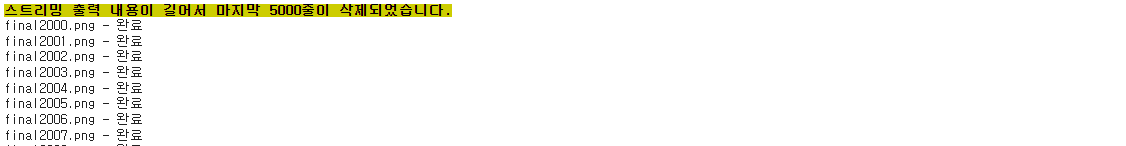

* 만일 이미지가 저장되지 않으면,

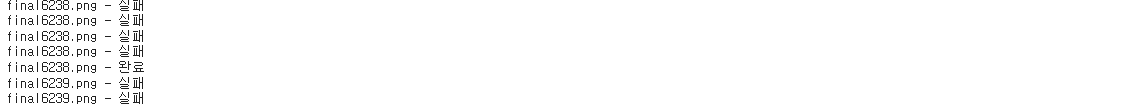

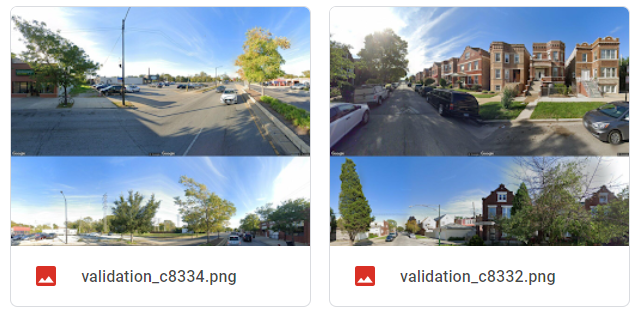

#**데이터셋 구축**

* 데이터셋은 colab의 flow_from_directory를 사용하여 폴더 형태로 구축한다.
* API 오류를 제외하고 사용할 수 있는 데이터의 갯수는 crime data 55523개, non-crime data 24483개 이다.
* Crime data: train / test / validation : 35534 / 8884 / 11105
* Non-Crime data: train / test / validation : 18653 / 4663 / 5830



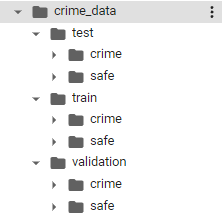

In [ ]:
# 서로의 공유 폴더에 저장한 사진 파일을 하나의 폴더에 모으기 위하여 코드를 사용하였다.

import os
cnt = 10249

for i in range(5354,6208):
  if cnt>(10249+857):
    print(i)
    break
  try:
    os.renames(f"/content/drive/MyDrive/인지개_코딥/criminal 10/criminal 10/final{i}.png",
              f"/content/drive/MyDrive/인지개_코딥/crime_data/validation/crime/validation_c{cnt}.png")
    cnt+=1
  except:
    continue

print(cnt)

# **Imagenet으로 전이학습된 VGG16을 사용한 이진 분류기**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K


In [ ]:
# 추론하는 함수 predict_vgg16

def predict_vgg16(model, filename) :

  # 이미지 파일을 읽고 화면에 표시
  image = load_img(filename)
  # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
  display(image)

  ## 파일 안 띄우고 싶으면 굳이? 안 해도 됨

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    


In [ ]:
# 이미지 전처리

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "train"
test_dir = "test"

#labeling data: imagedatagenerator을 사용하면 폴더 이름을 레이블링
#data augment

train_dir = "/content/drive/MyDrive/crime_data/train"
validation_dir = "/content/drive/MyDrive/crime_data/validation"
batch_size = 128
image_size = 224

In [ ]:
# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 최대 20도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)
custom_labels = list(validation_generator.class_indices.keys())

Found 54167 images belonging to 2 classes.
Found 16929 images belonging to 2 classes.


In [ ]:
# vgg16 불러오기

from tensorflow.keras.applications import vgg16
model = vgg16.VGG16()
model.summary()
files = [
         '/content/drive/MyDrive/Colab Notebooks/crime_data/train/crime/final6518.png',
         '/content/drive/MyDrive/Colab Notebooks/crime_data/train/crime/final6521.png',
]

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
K.clear_session() # 새로운 세션으로 시작

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정(Freezing)
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 모델
model.summary()

vgg16_model_path = 'new_trained_from_vgg16.h5'

model.save(vgg16_model_path)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# 과적합 방지
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience = 100, verbose = 1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
from keras.models import load_model
from tensorflow.keras import optimizers
import numpy as np

# 모델 로딩
model = load_model(vgg16_model_path)

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# 모델 학습
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      callbacks = [es, mc],
      verbose=1)
 

# 모델 저장
model.save(vgg16_model_path)

In [ ]:
# 정확도/loss 시각화

import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='loss')
plt.title('loss')
plt.legend()
plt.show()